# Author :Md. Shafiur Rahman Khan

# Roll Number:2207701

# PhD. Student

# Using VGG16

In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd

In [2]:
image_size = [224, 224]

In [4]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
from glob import glob
folders = glob('C:\\Users\\User\\Desktop\\Fuzzy Logic\\Dataset\\Train\\Train\\*')

In [7]:
folders

['C:\\Users\\User\\Desktop\\Fuzzy Logic\\Dataset\\Train\\Train\\Female',
 'C:\\Users\\User\\Desktop\\Fuzzy Logic\\Dataset\\Train\\Train\\Finger Print',
 'C:\\Users\\User\\Desktop\\Fuzzy Logic\\Dataset\\Train\\Train\\Male']

In [8]:
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [10]:
model = Model(inputs = vgg.input, outputs = prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [15]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [16]:
train_set = train_data_gen.flow_from_directory('C:\\Users\\User\\Desktop\\Fuzzy Logic\\Dataset\\Train\\Train', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 60893 images belonging to 3 classes.


In [17]:
test_set = test_data_gen.flow_from_directory('C:\\Users\\User\\Desktop\\Fuzzy Logic\\Dataset\\Test\\Test', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 50549 images belonging to 3 classes.


In [18]:
mod = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/2
1903/1903 [==============================] - 9856s 5s/step - loss: 0.1133 - acc: 0.9670 - val_loss: 0.0089 - val_acc: 0.9975
Epoch 2/2
1903/1903 [==============================] - 17048s 9s/step - loss: 0.1042 - acc: 0.9742 - val_loss: 0.0136 - val_acc: 0.9966


In [ ]:
import matplotlib.pyplot as plt
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(mod.history['accuracy'], label='train accuracy')
plt.plot(mod.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Accuracy:99.75%

Text(0.5, 1.0, 'Female Face')

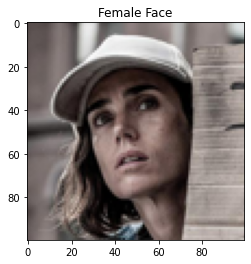

In [18]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("C:\\Users\\User\\Desktop\\Fuzzy Logic\\Dataset\\Test\\Test\\Female\\15.png"))
plt.title("Female Face")

Text(0.5, 1.0, 'Female Finger Print')

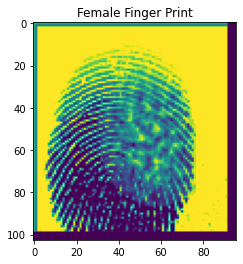

In [19]:
plt.imshow(plt.imread("C:\\Users\\User\\Desktop\\Fuzzy Logic\\Dataset\\Test\\Test\\Finger Print\\Altered-Hard\\1__M_Left_little_finger_Obl.BMP"))
plt.title("Female Finger Print")

In [20]:
import sys
sys.stdout.write('Finger Print is matched with that person and verification is complete.')

Finger Print is matched with that person and verification is complete.

# Finger Print is matched with that person and verification is complete.